# Customer Spending Dataset

This is a toy dataset available on [Kaggle](https://www.kaggle.com/datasets/shrutimechlearn/customer-data).

Let's conduct a basic EDA on it.

## Data Preparation and Cleaning

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [170]:
dataset[dataset["Genre"].isna() | dataset["Genre"].isnull()].size

0

In [171]:
dataset[dataset["Age"].isna() | dataset["Age"].isnull()].size

0

In [172]:
dataset[dataset["CustomerID"].isna() | dataset["CustomerID"].isnull()].size

0

In [173]:
dataset[dataset["Annual_Income_(k$)"].isna() | dataset["Annual_Income_(k$)"].isnull()].size

0

In [174]:
dataset[dataset["Spending_Score"].isna() | dataset["Spending_Score"].isnull()].size

0

Let's clean clean the dataframe, making sure to use sensible naming conventions for each column.

In [175]:
dataset_backup = dataset.copy()
dataset.drop("CustomerID", axis=1, inplace=True)

In [176]:
dataset.rename(
    columns={
        "Spending_Score":"spending_score",
        "Annual_Income_(k$)":"annual_income",
        "Age":"age",
        "Genre":"gender"
    },
    inplace=True
)

## Exploratory Data Analysis

In [177]:
dataset

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [178]:
dataset.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Let's make a few bar plots to get acquainted with the dataset

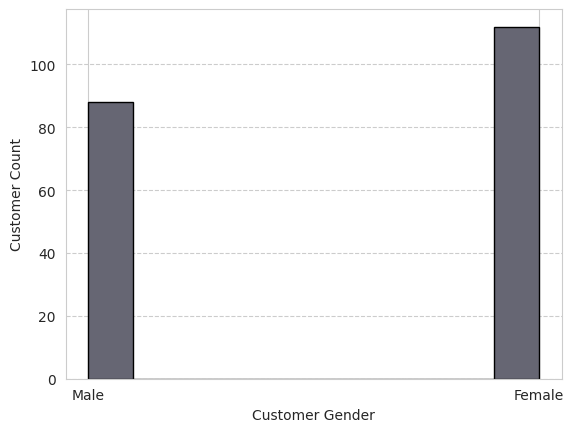

In [179]:
gender = dataset.gender
fig, ax = plt.subplots()
ax.hist(gender, color=(0.4,0.4,0.45), edgecolor="black",zorder=2)
ax.set_xlabel("Customer Gender")
ax.set_ylabel("Customer Count")
ax.yaxis.grid(linestyle='--', zorder=0)
plt.show()

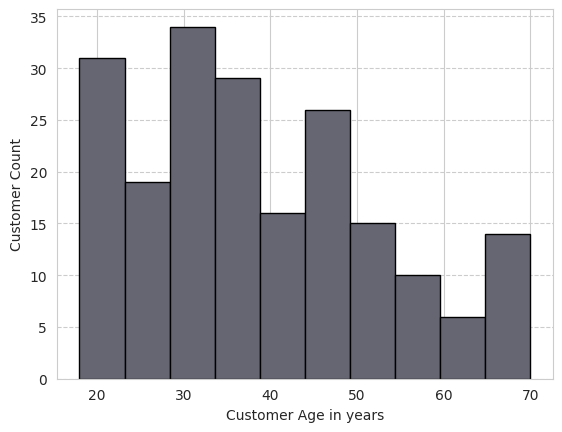

In [180]:
age = dataset.age
fig, ax = plt.subplots()
ax.hist(age, color=(0.4,0.4,0.45), edgecolor="black",zorder=2)
ax.set_xlabel("Customer Age in years")
ax.set_ylabel("Customer Count")
ax.yaxis.grid(linestyle='--', zorder=0)
plt.show()

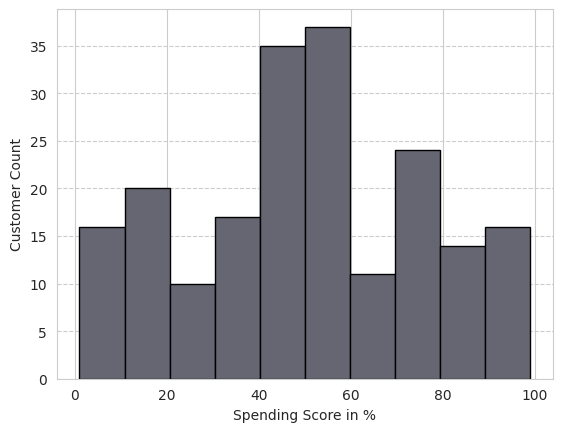

In [181]:
scores = dataset.spending_score
fig, ax = plt.subplots()
ax.hist(scores, color=(0.4,0.4,0.45), edgecolor="black",zorder=2)
ax.set_xlabel("Spending Score in %")
ax.set_ylabel("Customer Count")
ax.yaxis.grid(linestyle='--', zorder=0)
plt.show()

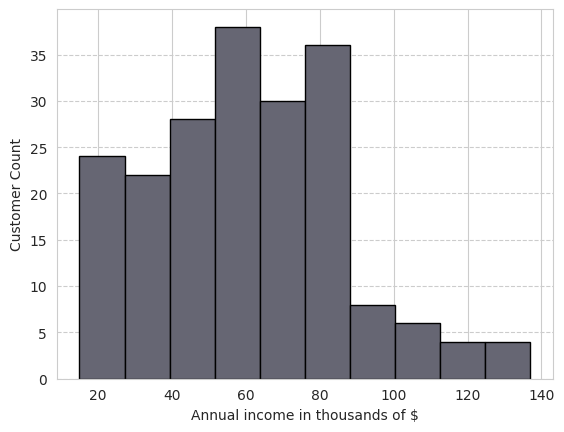

In [182]:
annual_income = dataset.annual_income
fig, ax = plt.subplots()
ax.hist(annual_income, color=(0.4,0.4,0.45), edgecolor="black",zorder=2)
ax.set_xlabel("Annual income in thousands of $")
ax.set_ylabel("Customer Count")
ax.yaxis.grid(linestyle='--', zorder=0)
plt.show()

Let's see if any correlations between the columns are visible

In [183]:
import seaborn as sns

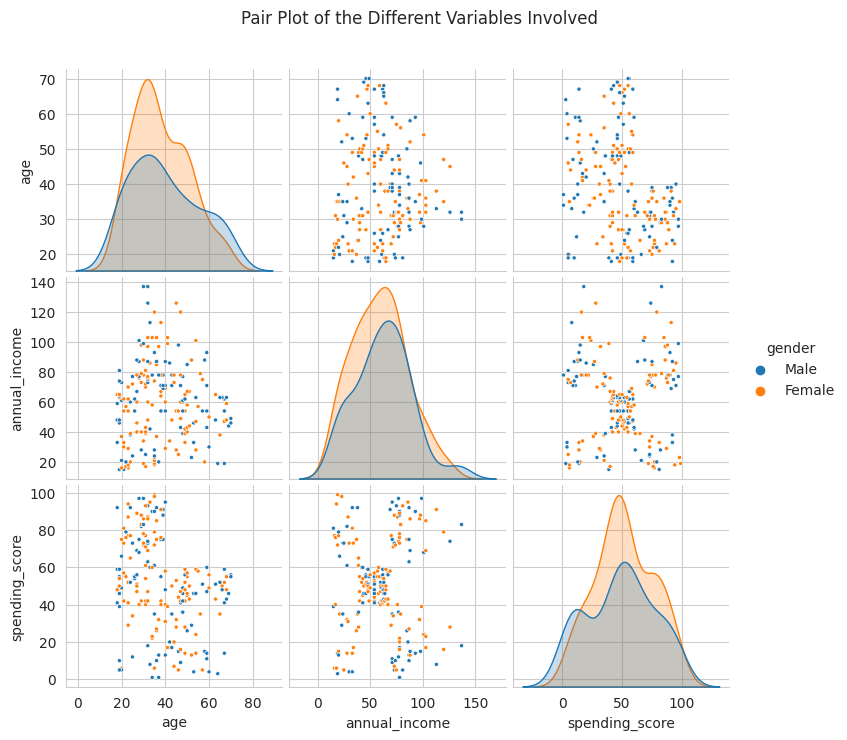

In [184]:
g = sns.pairplot(dataset, plot_kws=dict(marker='.', linewidth=0.5), hue="gender")

# Add title
g.fig.subplots_adjust(top=0.9)
_ = g.fig.suptitle("Pair Plot of the Different Variables Involved")

## Detailed Analysis

Let's analyze the correlation between the different variable couples
- gender and age
- age and income
- gender and income
- gender and spending
- age and spending
- income and spending


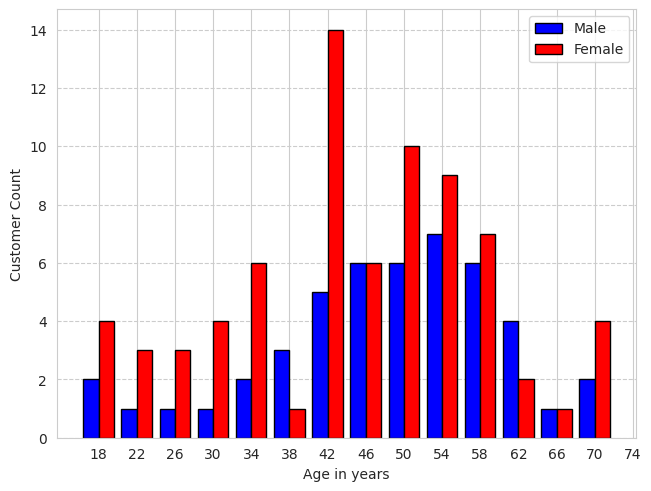

In [186]:
age_male = dataset[dataset["gender"]=="Male"].spending_score
age_female = dataset[dataset["gender"]=="Female"].spending_score
bins = np.arange(18, 75, 4)
fig, ax = plt.subplots(layout="constrained")
ax.hist([age_male, age_female], bins=bins-2, color=("blue", "red"), edgecolor="black",zorder=2)
ax.set_xlabel("Age in years")
ax.set_ylabel("Customer Count")
ax.legend(("Male", "Female"))
ax.yaxis.grid(linestyle='--', zorder=0)
plt.xticks(bins)
plt.show()